In [1016]:
import numpy as np
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import uncertainties
from uncertainties import ufloat
from scipy import optimize
import scipy.odr as odr
from scipy.optimize import curve_fit


In [1017]:
def optical_thickness_to_phase(d, wavelength = 617e-9):
    return (2 * np.pi / wavelength) * d

In [1018]:
Measurement_OPD = np.loadtxt("/Users/jan-niklastopf/Studium/7.Semester/Coding/Nanotechnology/Report/TP2025_focalLengt/EXPORT PHA im_0006.txt")
intensity = np.loadtxt("/Users/jan-niklastopf/Studium/7.Semester/Coding/Nanotechnology/Report/TP2025_focalLengt/EXPORT INT im_0005.txt")

ny, nx = Measurement_OPD.shape

#To put everythin in meters
Measurement_OPD = Measurement_OPD*10**(-9)

wavelength = 617e-9

pixel_size = 180e-6/128 #m


x = np.linspace(-nx//2, nx//2 - 1, nx)
x = x*pixel_size
y = np.linspace(-ny//2, ny//2 - 1, ny)
y = y*pixel_size

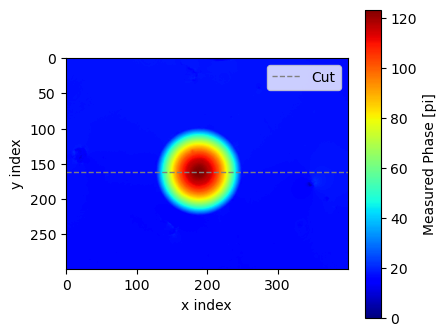

In [1019]:
# Optional: Visualisierung
phase = optical_thickness_to_phase(Measurement_OPD)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(phase, cmap='jet')
plt.colorbar(label = "Measured Phase [pi]")
plt.xlabel("x index")
plt.ylabel("y index")

# Beste Zeile finden (wo die Phase am höchsten ist)
row_index = np.argmax(np.max(phase, axis=1))

plt.axhline(y=row_index, color='gray', linestyle='--', linewidth=1, label = "Cut")

plt.legend()


In [1020]:
print(row_index)
phi = phase[row_index, :]

# x-Achse auf Pixelbasis (zentriert)
nx = phase.shape[1]

#Values for the Fit:
cutaway_left = 125
cutaway_right = 147
x_fit_pixel = np.linspace(-nx// 2 + cutaway_left, nx // 2 - cutaway_right, nx-cutaway_left-cutaway_right)
x_fit = x_fit_pixel * pixel_size
phi_fit = phi[cutaway_left:-cutaway_right]


161


In [1021]:
#Model
def spherical_lens_phase(r, f, phi0, shift):
    return 2*np.pi - (2 * np.pi / wavelength) * (np.sqrt((r+shift)**2 + f**2) - f) + phi0

In [1022]:
# Fit durchführen
popt, pcov = curve_fit(spherical_lens_phase, x_fit, phi_fit, p0=[0.000001, 0, 0]) 

# Ergebnisse
fitted_f = popt[0]
phi0 = popt[1]
print(f"Fitted Focal length: {fitted_f}")
print(f"Brightes row: {row_index}")


Fitted Focal length: 0.0003553651725394685
Brightes row: 161


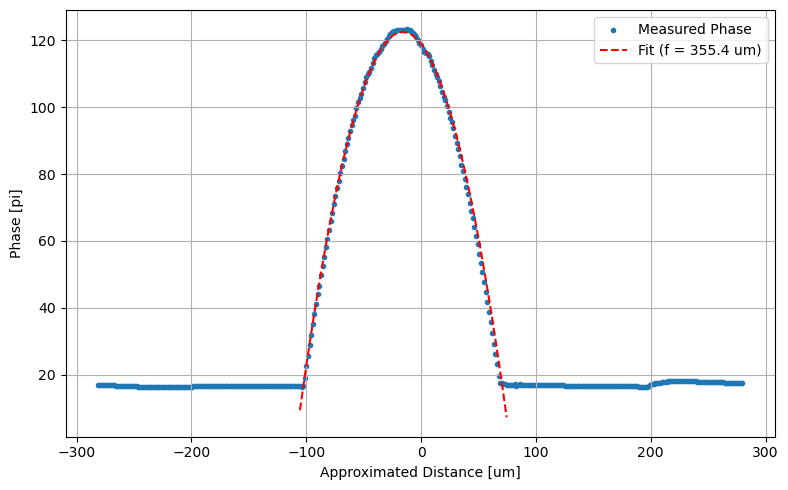

In [1023]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x*10e5, phi, label="Measured Phase", marker = ".")
plt.plot(x_fit*10e5, spherical_lens_phase(x_fit, *popt), 'r--', label=f"Fit (f = {fitted_f*10**6:.1f} um)")
plt.xlabel("Approximated Distance [um]")
plt.ylabel("Phase [pi]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()